<a href="https://colab.research.google.com/github/moaadouhmad99-ops/DI_Bootcamp/blob/main/Week4/Day1/Ex_XP_Gold_W4_D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercises XP Gold**


**Exercise 1 : Bar Graph**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Créer un dataset fictif ---
data = {
    "Product Category": ["Electronics", "Clothing", "Home & Kitchen", "Books", "Toys", "Sports"],
    "Total Sales": [120000, 80000, 95000, 45000, 60000, 70000]
}

df = pd.DataFrame(data)
df.head()

,Product Category,Total Sales
0,Electronics,120000
1,Clothing,80000
2,Home & Kitchen,95000
3,Books,45000
4,Toys,60000


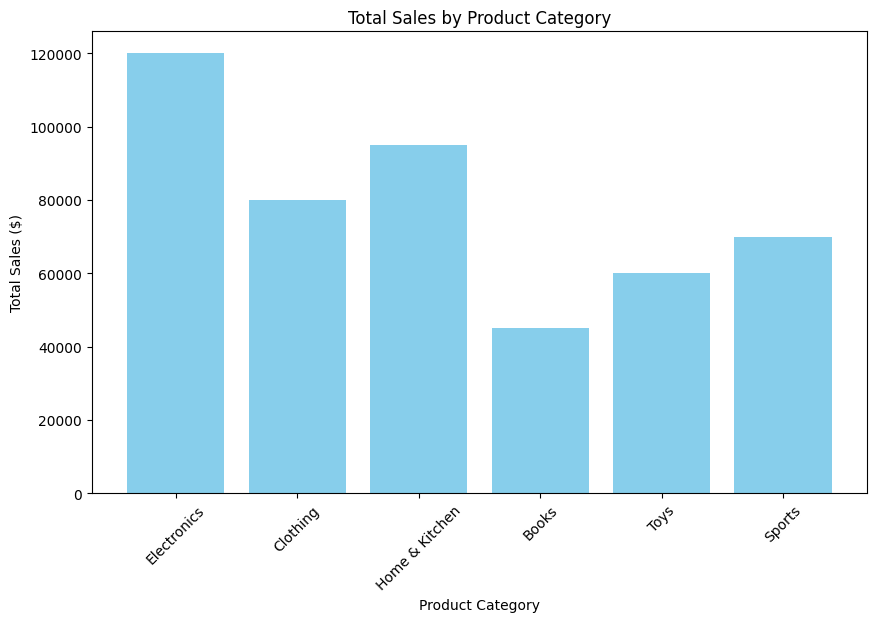

In [ ]:
# --- 2. Créer le graphique en barres ---
plt.figure(figsize=(10,6))  # taille du graphique
plt.bar(df["Product Category"], df["Total Sales"], color='skyblue')

# --- 3. Ajouter les titres et labels ---
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)  # rotation pour que les noms soient lisibles

# --- 4. Afficher le graphique ---
plt.show()

**Exercise 2 : Hierarchical Indexing**

In [ ]:

# Données fournies par l'utilisateur
data = {
    "Temperature": [28, 32, 35, 25, 31, 29, 33, 27]
}

# MultiIndex fourni par l'utilisateur
index = pd.MultiIndex.from_tuples([
    ("Canada", "Toronto", "2023-07-01"),
    ("Canada", "Toronto", "2023-07-02"),
    ("Canada", "Montreal", "2023-07-01"),
    ("Canada", "Montreal", "2023-07-02"),
    ("USA", "New York", "2023-07-01"),
    ("USA", "New York", "2023-07-02"),
    ("USA", "Los Angeles", "2023-07-01"),
    ("USA", "Los Angeles", "2023-07-02")
], names=["Country", "City", "Date"])

# Création du DataFrame
df = pd.DataFrame(data, index=index)

print("--- DataFrame Original ---")
print(df)

--- DataFrame Original ---
                                Temperature
Country City        Date                   
Canada  Toronto     2023-07-01           28
                    2023-07-02           32
        Montreal    2023-07-01           35
                    2023-07-02           25
USA     New York    2023-07-01           31
                    2023-07-02           29
        Los Angeles 2023-07-01           33
                    2023-07-02           27


In [ ]:
canada_data = df.loc["Canada"]

In [ ]:
print(canada_data)

                     Temperature
City     Date                   
Toronto  2023-07-01           28
         2023-07-02           32
Montreal 2023-07-01           35
         2023-07-02           25


In [ ]:

# 1. Appliquer la condition de température (> 30°C) sur les données du Canada
high_temp_canada = canada_data[canada_data["Temperature"] > 30]

print("\n--- Jours où la température a dépassé 30°C au Canada ---")
print(high_temp_canada)


--- Jours où la température a dépassé 30°C au Canada ---
                     Temperature
City     Date                   
Toronto  2023-07-02           32
Montreal 2023-07-01           35


Hierarchical Indexing (MultiIndex) :

Permet d’avoir plusieurs niveaux dans l’index (ici Country → City → Date).

Cela facilite la sélection rapide d’un pays ou d’une ville spécifique avec .loc[...].

Avantages :

Tu peux filtrer facilement par n’importe quel niveau de l’index sans créer de colonnes supplémentaires.

Permet des analyses plus rapides et claires quand les données ont plusieurs dimensions (ex : pays, ville, date).

**Exercise 3 : Advanced Filtering with Hierarchical Indices**

In [ ]:

# Données fournies
data = {
    "Salary": [48000, 52000, 60000, 45000, 70000, 30000],
    "Position": ["Analyst", "Manager", "Director", "Clerk", "VP", "Intern"]
}

# MultiIndex fourni
index = pd.MultiIndex.from_tuples([
    ("HR", "Alice"),
    ("HR", "Bob"),
    ("IT", "Charlie"),
    ("IT", "David"),
    ("Finance", "Eve"),
    ("Finance", "Frank")
], names=["Department", "Employee"])

# Création du DataFrame
df = pd.DataFrame(data, index=index)

print("--- DataFrame Original ---")
print(df)





--- DataFrame Original ---
                     Salary  Position
Department Employee                  
HR         Alice      48000   Analyst
           Bob        52000   Manager
IT         Charlie    60000  Director
           David      45000     Clerk
Finance    Eve        70000        VP
           Frank      30000    Intern


In [ ]:
# --- Code pour filtrer les données ---

# Filtrer le DataFrame complet en utilisant un masque booléen sur la colonne 'Salary'
# Le filtre est appliqué globalement, mais grâce à l'index hiérarchique,
# les résultats sont naturellement groupés par département.
high_salary_employees = df[df["Salary"] > 50000]

print("\n--- Employés avec un salaire supérieur à 50 000 ---")
print(high_salary_employees)


--- Employés avec un salaire supérieur à 50 000 ---
                     Salary  Position
Department Employee                  
HR         Bob        52000   Manager
IT         Charlie    60000  Director
Finance    Eve        70000        VP


**Exercise 4 : Combined Filtering and Hierarchical Indexing**

In [ ]:
data = {
    "Country": ["USA", "USA", "USA", "Canada", "Canada", "Mexico"],
    "City": ["New York", "Los Angeles", "Chicago", "Toronto", "Vancouver", "Mexico City"],
    "Hospital": ["H1", "H2", "H3", "H4", "H5", "H6"],
    "Patients": [600, 450, 700, 300, 200, 800]
}

# Création du DataFrame initial
df = pd.DataFrame(data)

print("--- DataFrame Original (Plat) ---")
print(df)

--- DataFrame Original (Plat) ---
  Country         City Hospital  Patients
0     USA     New York       H1       600
1     USA  Los Angeles       H2       450
2     USA      Chicago       H3       700
3  Canada      Toronto       H4       300
4  Canada    Vancouver       H5       200
5  Mexico  Mexico City       H6       800


In [ ]:
df_indexed = df.set_index(["Country", "City"])

print("\n--- DataFrame avec Index Hiérarchique ---")
print(df_indexed)


--- DataFrame avec Index Hiérarchique ---
                    Hospital  Patients
Country City                          
USA     New York          H1       600
        Los Angeles       H2       450
        Chicago           H3       700
Canada  Toronto           H4       300
        Vancouver         H5       200
Mexico  Mexico City       H6       800


In [ ]:
# Utilisation combinée de .loc (pour la sélection du pays) et d'un masque booléen (pour les patients)
# On sélectionne d'abord toutes les données pour 'USA'
usa_data = df_indexed.loc["USA"]

In [ ]:
# Puis on filtre ces données pour les hôpitaux avec > 500 patients
filtered_results = usa_data[usa_data["Patients"] > 500]

In [ ]:
print("\n--- Résultats Filtrés (USA, > 500 Patients) ---")
print(filtered_results)


--- Résultats Filtrés (USA, > 500 Patients) ---
         Hospital  Patients
City                       
New York       H1       600
Chicago        H3       700


**Exercise 5 : Data Visualisation Using MatPlotlib**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


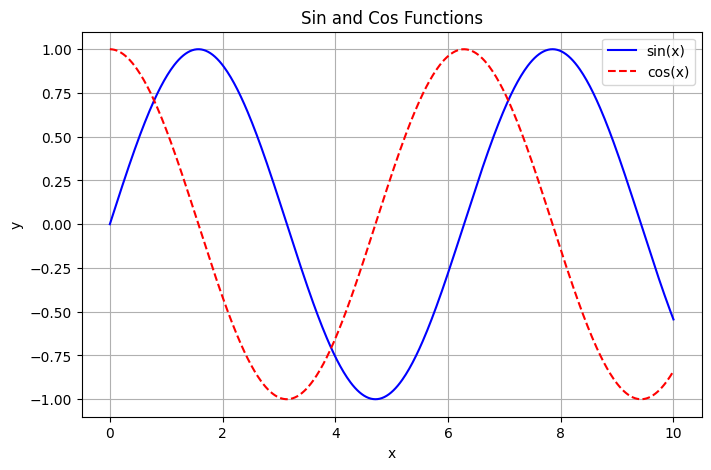

In [ ]:
# Génération des données
x = np.linspace(0, 10, 500)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Tracé
plt.figure(figsize=(8, 5))
plt.plot(x, y_sin, linestyle='-', color='blue', label='sin(x)')
plt.plot(x, y_cos, linestyle='--', color='red', label='cos(x)')

plt.title("Sin and Cos Functions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.show()


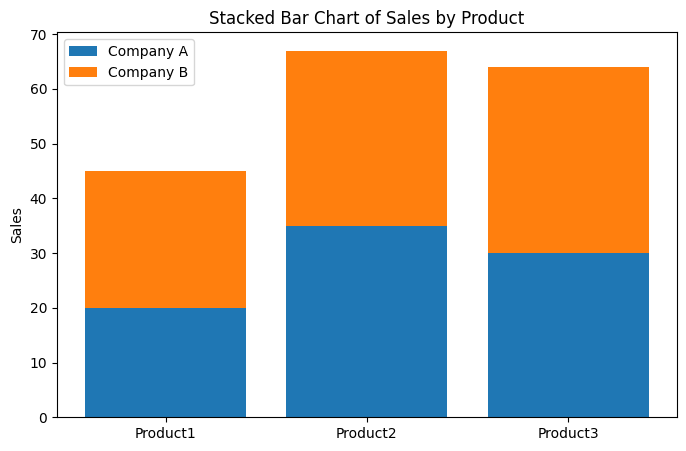

In [ ]:

# Données
products = ['Product1', 'Product2', 'Product3']
companyA = np.array([20, 35, 30])
companyB = np.array([25, 32, 34])

x = np.arange(len(products))

# Création du graphique en barres empilées
plt.figure(figsize=(8, 5))
plt.bar(x, companyA, label='Company A')
plt.bar(x, companyB, bottom=companyA, label='Company B')

plt.xticks(x, products)
plt.ylabel('Sales')
plt.title('Stacked Bar Chart of Sales by Product')
plt.legend()

plt.show()


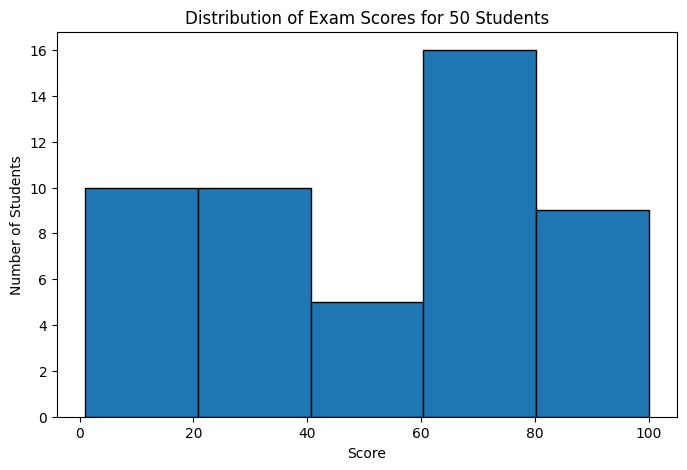

In [ ]:
# Generate random scores for 50 students (0 to 100)
scores = np.random.randint(0, 101, 50)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(scores, bins=5, edgecolor='black')

plt.title("Distribution of Exam Scores for 50 Students")
plt.xlabel("Score")
plt.ylabel("Number of Students")

plt.show()



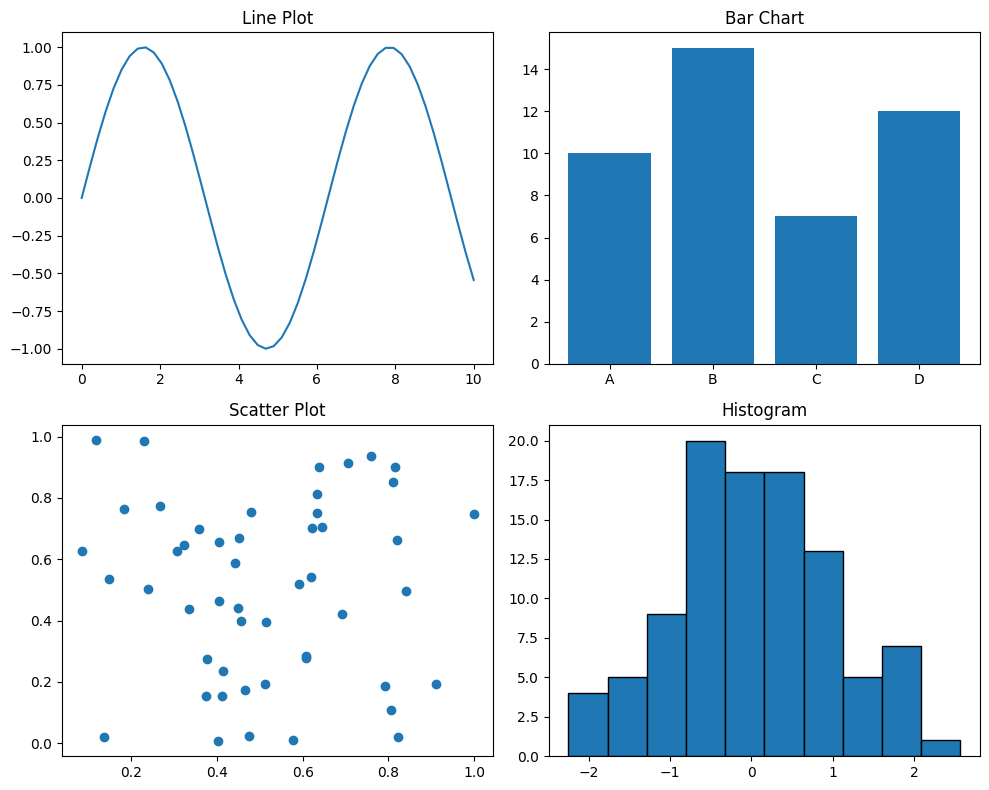

In [ ]:
# Sample data
x = np.linspace(0, 10, 50)
y = np.sin(x)

bar_categories = ['A', 'B', 'C', 'D']
bar_values = [10, 15, 7, 12]

scatter_x = np.random.rand(50)
scatter_y = np.random.rand(50)

hist_data = np.random.randn(100)

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 1. Line plot
axs[0, 0].plot(x, y)
axs[0, 0].set_title("Line Plot")

# 2. Bar chart
axs[0, 1].bar(bar_categories, bar_values)
axs[0, 1].set_title("Bar Chart")

# 3. Scatter plot
axs[1, 0].scatter(scatter_x, scatter_y)
axs[1, 0].set_title("Scatter Plot")

# 4. Histogram
axs[1, 1].hist(hist_data, bins=10, edgecolor='black')
axs[1, 1].set_title("Histogram")

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntSlider, interact

# Generate data
x = np.random.rand(50)
y = np.random.rand(50)

# Function to update the scatter plot
def update(point_size):
    plt.figure(figsize=(7, 5))
    plt.scatter(x, y, s=point_size)
    plt.title("Interactive Scatter Plot (Point Size Slider)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

# Create interactive slider
interact(update, point_size=IntSlider(min=10, max=300, step=10, value=50));


interactive(children=(IntSlider(value=50, description='point_size', max=300, min=10, step=10), Output()), _dom…

# **Exercise 6 : Data Visualisation**